In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import kagglehub
import os
path = kagglehub.dataset_download("vijayaadithyanvg/car-price-predictionused-cars")
print("Downloaded files:", os.listdir(path))

Downloaded files: ['.nfs000000002f9297000000020f', 'car data.csv']


In [6]:
print("Files in dataset folder:")
print(os.listdir(path))

Files in dataset folder:
['.nfs000000002f9297000000020f', 'car data.csv']


In [8]:
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]
file_path = os.path.join(path, csv_files[0])
print(f"Using file: {file_path}")

Using file: /kaggle/input/car-price-predictionused-cars/car data.csv


In [9]:
df = pd.read_csv(file_path)
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [10]:
print(df.tail())

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0       87934    Petrol   
299     city  2017          11.50           12.5        9000    Diesel   
300     brio  2016           5.30            5.9        5464    Petrol   

    Selling_type Transmission  Owner  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [12]:
print(df.isnull().sum())
print(df.describe())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


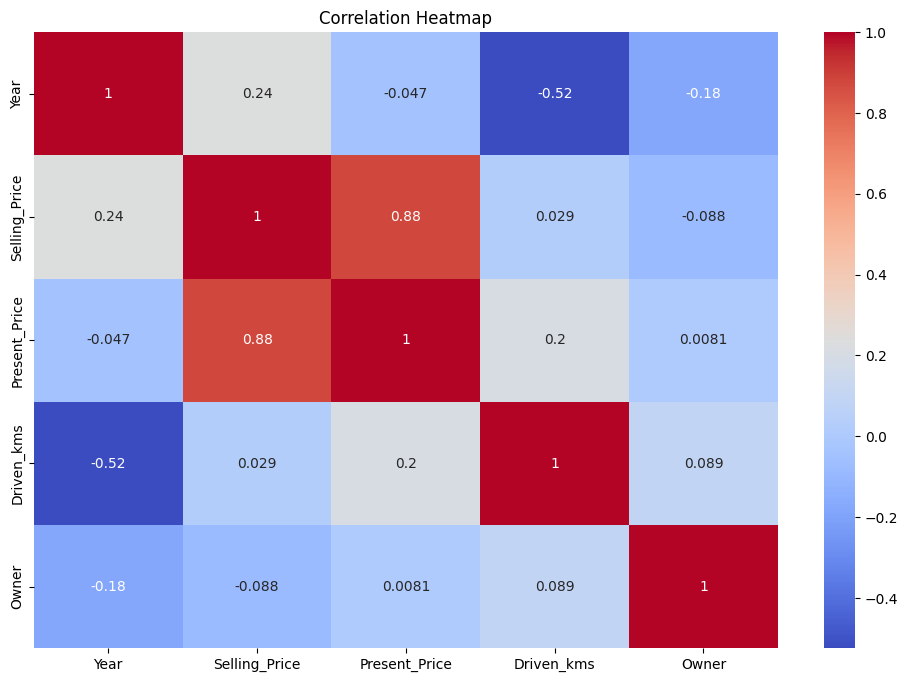

In [13]:
if df.select_dtypes(include=[np.number]).shape[1] > 1:
    plt.figure(figsize=(12,8))
    sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

In [14]:
for col in df.columns:
    if 'id' in col.lower():
        df = df.drop(col, axis=1)
        print(f"Dropped column: {col}")
df = df.fillna(df.mean(numeric_only=True))

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)
print("\nEncoded Columns:", df_encoded.columns)


Encoded Columns: Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       ...
       'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'],
      dtype='object', length=106)


In [18]:
target_candidates = [col for col in df_encoded.columns if 'price' in col.lower()]
if not target_candidates:
    raise ValueError("No column with 'price' found. Check your dataset columns.")
target_col = target_candidates[0]

In [19]:
X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [22]:
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 9.22
Root Mean Squared Error (RMSE): 3.04
R² Score: 0.60


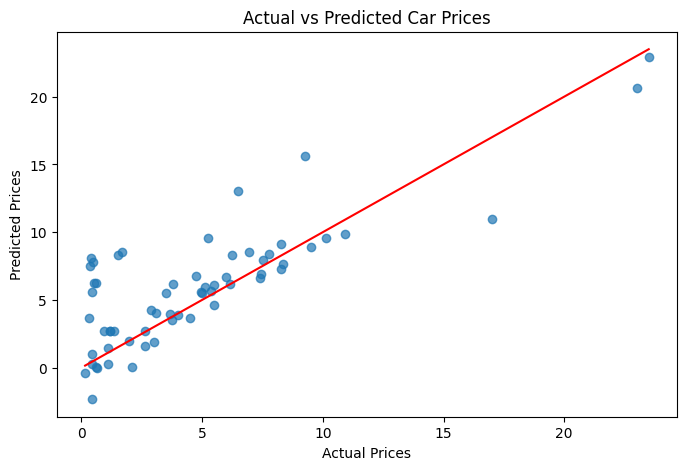

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()